# parsing files using pyedflib

In [1]:
import pyedflib
import numpy as np
import os

In [46]:
file_name = os.path.join('eeg-dataset-of-fusion-relaxation-and-concentration-moods/S001E01.edf')
f = pyedflib.EdfReader(file_name)
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

In [43]:
sigbufs.shape

(14, 46080)

In [44]:
for item in sigbufs:
    print(item)

[ 5.52695048  0.4138204  -4.20900954 ... 47.06237705 41.94924697
 36.34581674]
[ 1.40203126 -3.71969174 -3.71969174 ... 79.86246871 73.19531285
 68.07358985]
[-1.86030009 -1.86030009 -2.37632987 ... 65.82916012 65.31739505
 62.75430498]
[ 3.72363532  8.34046603  2.19084753 ... 20.63970301 20.1410853
 21.67387309]
[ 5.53618666  1.42830086  0.40665051 ... 68.60181169 65.02603545
 63.98310071]
[ 3.17868191  2.66635366  4.20333841 ... 39.07659103 38.56426278
 40.61357578]
[ 2.71330404  1.68696025  2.20013214 ... 70.40067671 70.9138486
 70.9138486 ]
[  1.40400819   2.43253609   2.43253609 ... 115.25002458 116.27855248
 119.35523117]
[  2.23833637   5.32422678   7.36405264 ... 711.47009833 711.47009833
 711.47009833]
[ 1.40578918  2.42947507  3.45316097 ... 62.94582242 59.35301515
 58.83786999]
[-11.27503296  -8.71514974  -8.71514974 ... 155.9102607  153.35037748
 151.2888786 ]
[ 0.8137377   1.84058747  3.37813115 ... 69.02004921 64.91538109
 60.81344396]
[14.26770703 10.67753384  8.11953544

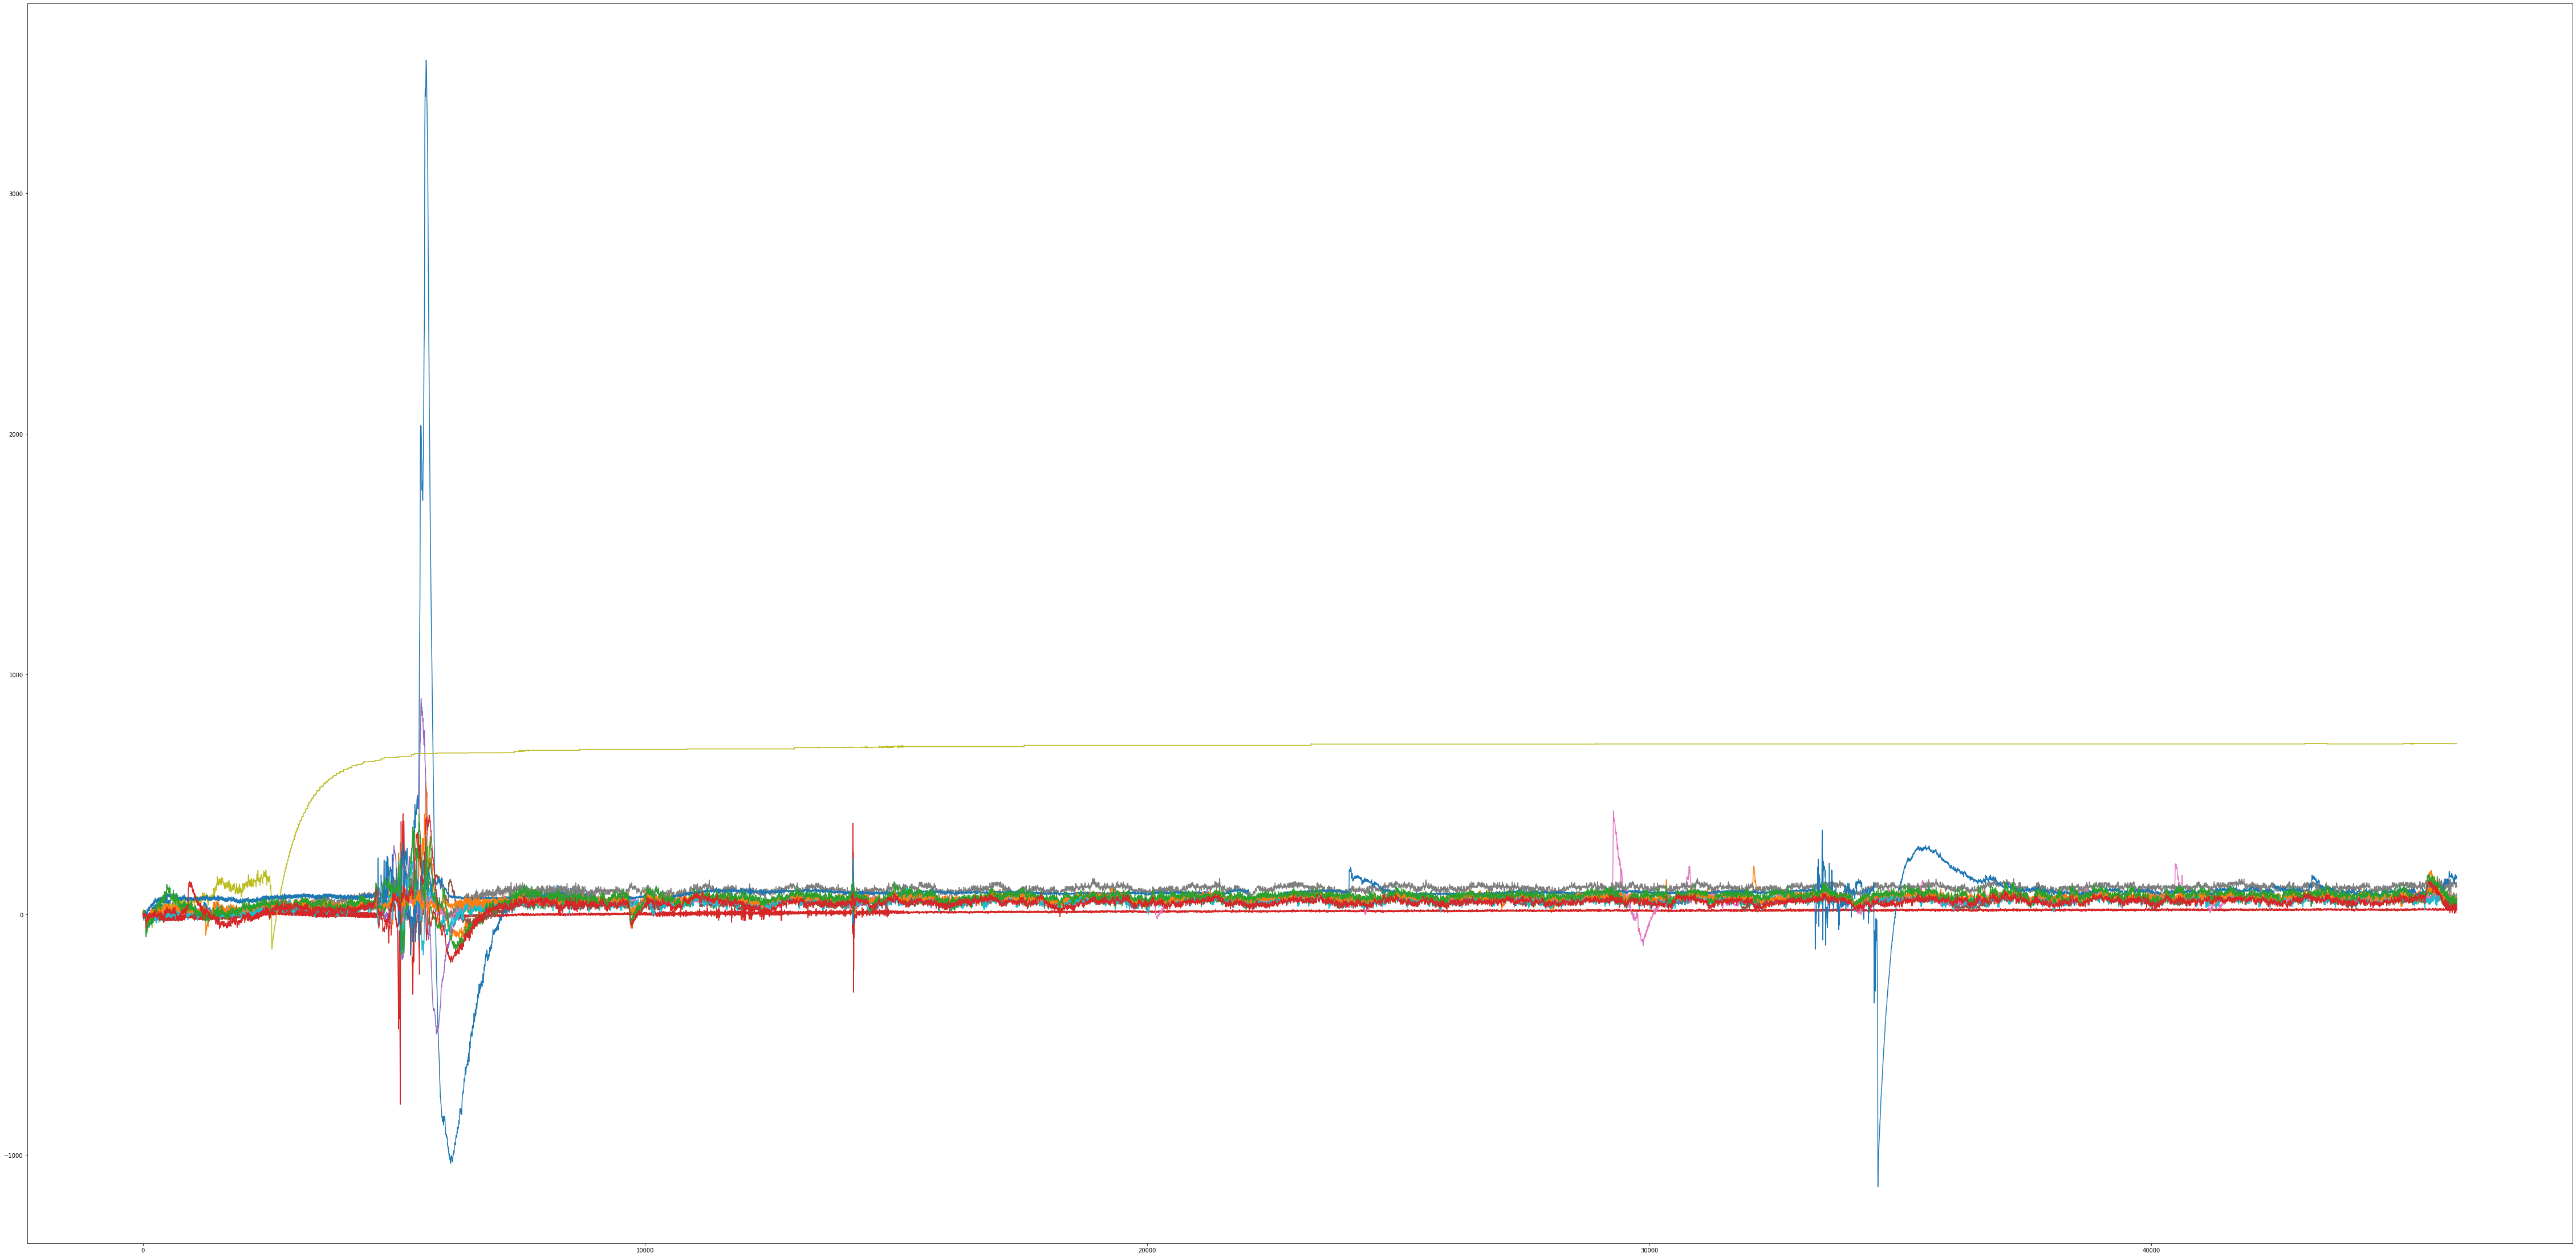

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(1, figsize=(80, 40))
for i in range(14):
    x = np.array([j for j in range(46080)])
    y = np.array(sigbufs[i])
    plt.plot(x,y)
plt.show()
#plt.savefig("eeg.png")

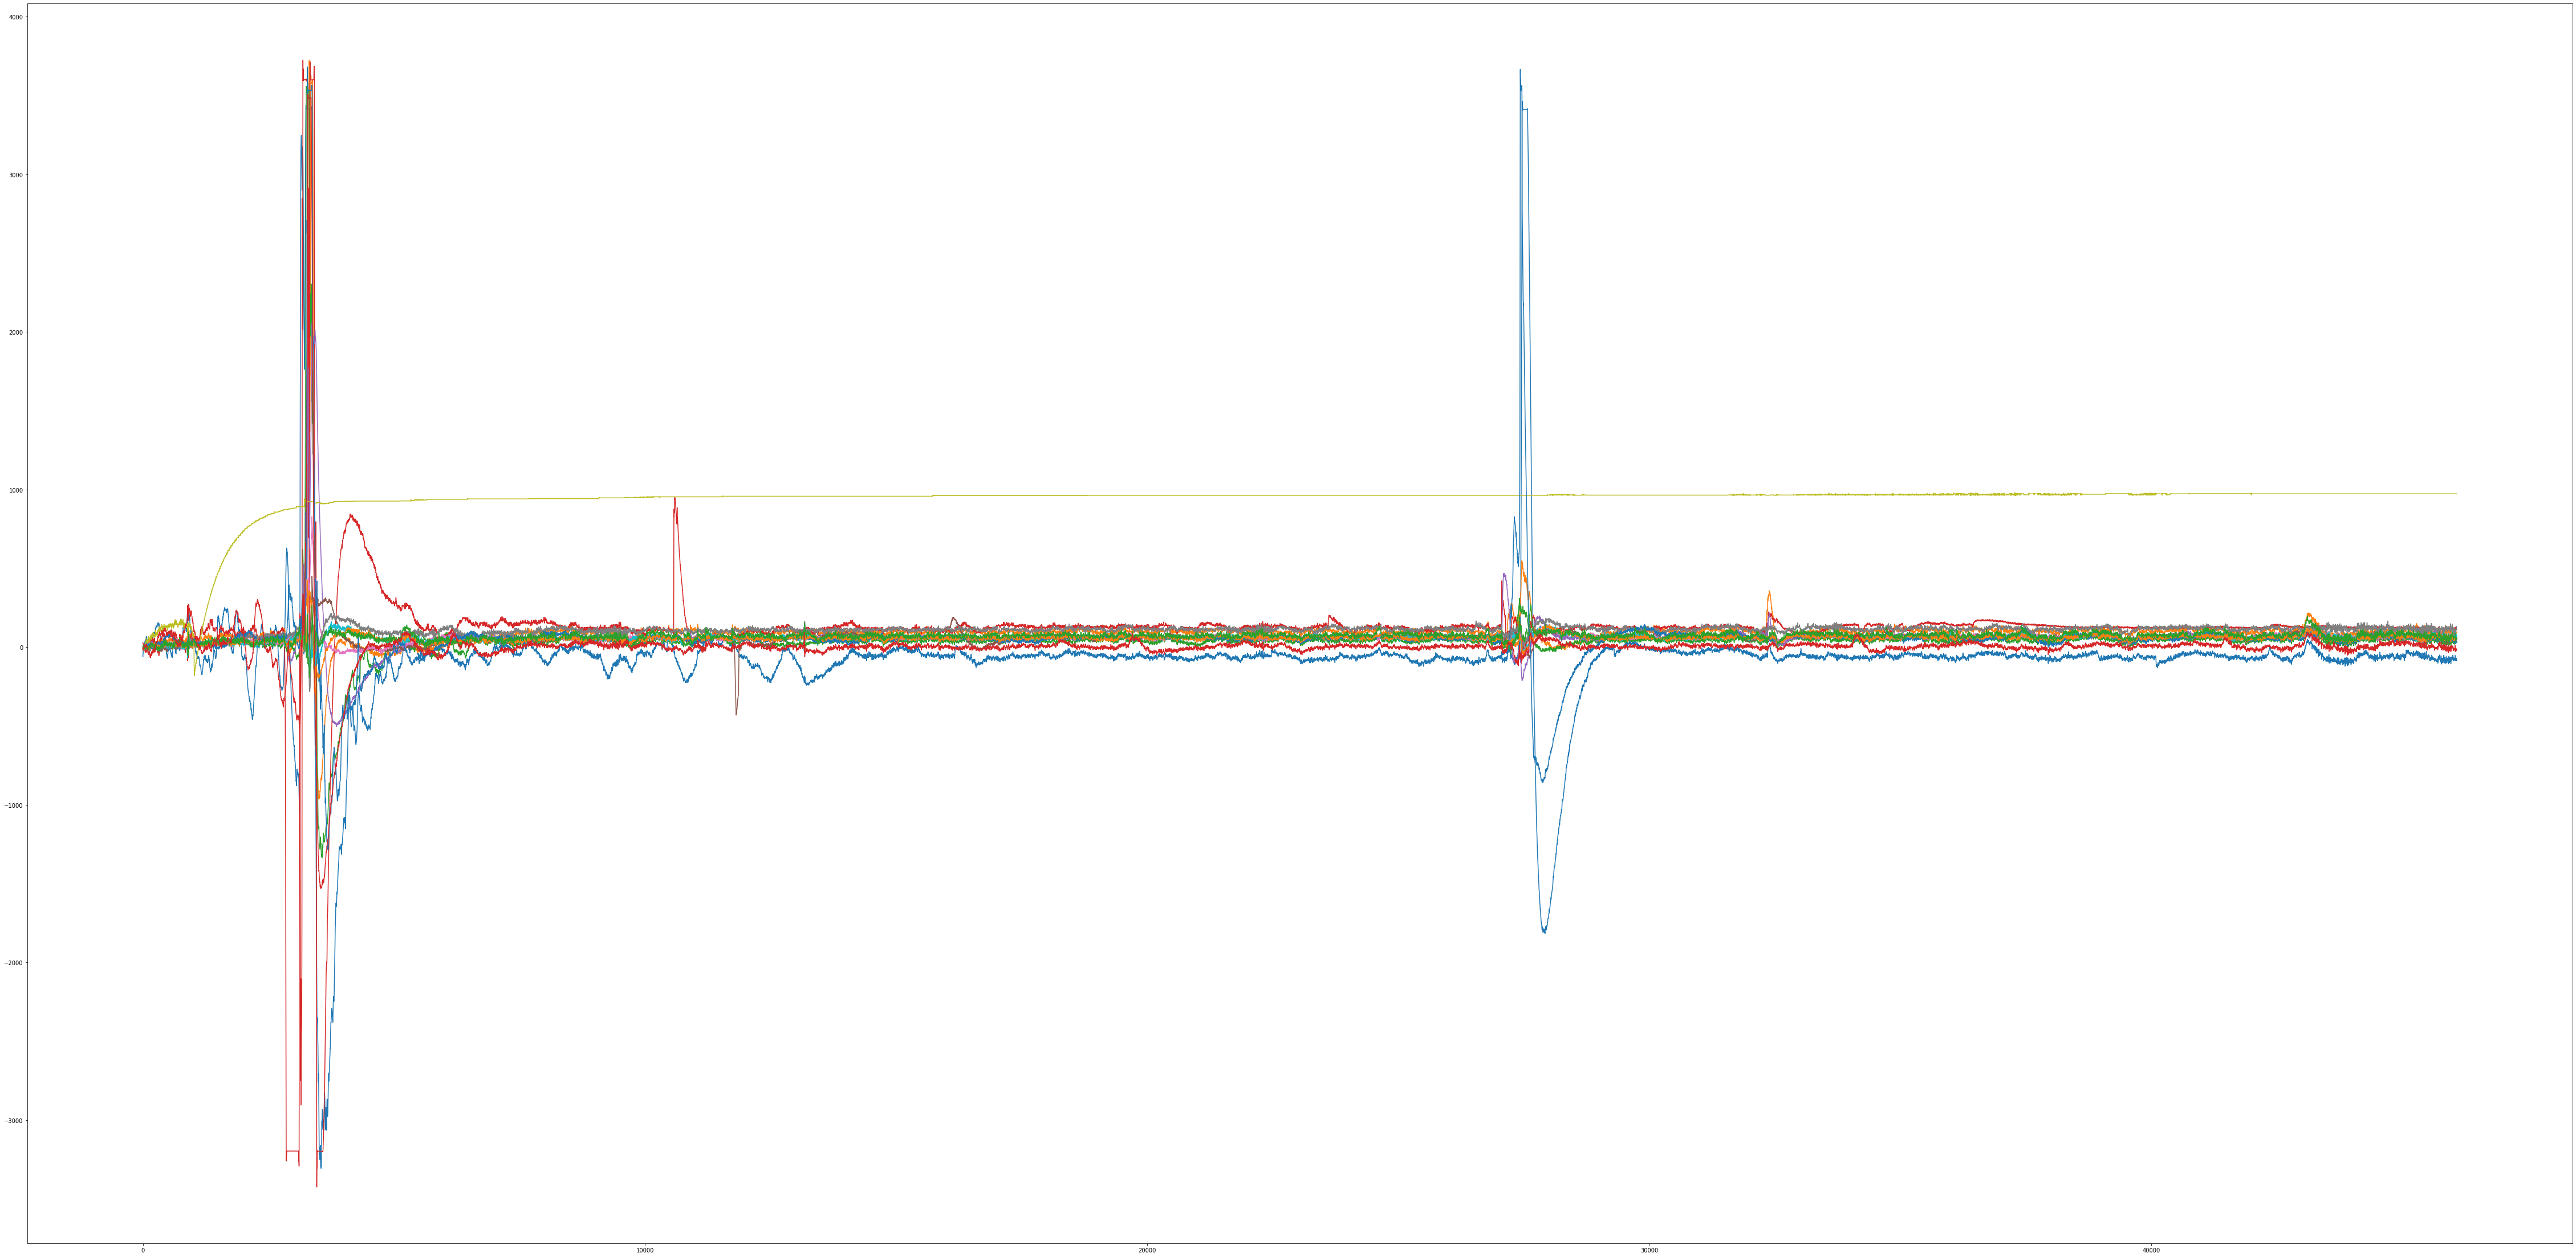

In [47]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(1, figsize=(80, 40))
for i in range(14):
    x = np.array([j for j in range(46080)])
    y = np.array(sigbufs[i])
    plt.plot(x,y)
plt.show()
#plt.savefig("eeg.png")

# Feature extraction using pyeeg

In [5]:
import pyeeg

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [38]:
print(os.listdir('eeg-dataset-of-fusion-relaxation-and-concentration-moods'))

['S001E01.edf', 'S001E02.edf', 'S001E03.edf', 'S001E04.edf', 'S002E01.edf', 'S002E02.edf', 'S002E03.edf', 'S002E04.edf', 'S003E01.edf', 'S003E02.edf', 'S003E03.edf', 'S003E04.edf', 'S004E01.edf', 'S004E02.edf', 'S004E03.edf', 'S004E04.edf', 'S005E01.edf', 'S005E02.edf', 'S005E03.edf', 'S005E04.edf', 'S006E01.edf', 'S006E02.edf', 'S006E03.edf', 'S006E04.edf', 'S007E01.edf', 'S007E02.edf', 'S007E03.edf', 'S007E04.edf', 'S008E01.edf', 'S008E02.edf', 'S008E03.edf', 'S008E04.edf', 'S009E01.edf', 'S009E02.edf', 'S009E03.edf', 'S009E04.edf', 'S010E01.edf', 'S010E02.edf', 'S010E03.edf', 'S010E04.edf', 'S011E01.edf', 'S011E02.edf', 'S011E03.edf', 'S011E04.edf', 'S012E01.edf', 'S012E02.edf', 'S012E03.edf', 'S012E04.edf', 'S013E01.edf', 'S013E02.edf', 'S013E03.edf', 'S013E04.edf', 'S014E01.edf', 'S014E02.edf', 'S014E03.edf', 'S014E04.edf', 'S015E01.edf', 'S015E02.edf', 'S015E03.edf', 'S015E04.edf', 'S016E01.edf', 'S016E02.edf', 'S016E03.edf', 'S016E04.edf', 'S017E01.edf', 'S017E02.edf', 'S017E03.

In [40]:
import csv
for filename in os.listdir('eeg-dataset-of-fusion-relaxation-and-concentration-moods'):
    file_name = os.path.join('eeg-dataset-of-fusion-relaxation-and-concentration-moods',filename)
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    new_filename = filename.replace(".edf",".csv")
    new_file_path = os.path.join('csvfiles',new_filename)
    with open(new_file_path, mode='w') as record_file:
        record_writer = csv.writer(record_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for record in sigbufs:
            record_writer.writerow(record)